## Zadanie 2

Plik ``beauty`` zawiera dane z pracy Hamermesha i Parker (2005) na temat oceny piękna instruktorów i jakości uch nauczania dla kilku kursów na University of Texas. Oceny dydaktyczne przeprowadzono pod koniec semestru, a oceny urody dokonano później przez sześciu studentów, którzy nie uczestniczyli w zajęciach i nie byli świadomi ocen kursu.

In [34]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import pandas as pd
import plotnine as p9

-  Utwórz regresję przy użyciu piękna (zmienna btystdave), aby przewidzieć oceny kursu (courseevaluation), kontrolując różne inne dane wejściowe. Wyświetl dopasowany model graficznie i objaśnij znaczenie każdego ze współczynników wraz z pozostałym odchyleniem standardowym. Wykreślić residua względem dopasowanych wartości.

- Dopasuj niektóre inne modele, w tym piękno, a także inne zmienne wejściowe. Rozważ co najmniej jeden model z interakcjami. Dla każdego modelu określ, jakie są predyktory i jakie są dane wejściowe i wyjaśnij znaczenie każdego z jego współczynników.

In [35]:
beauty=pd.read_csv("beauty.csv")
df = beauty
df

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
0,0,1,1,36,6,5,7,6,2,4,...,0,0,55.81395,4.7,43,1,0,2.129806,0.201567,0.000000
1,1,2,0,59,2,4,4,3,2,3,...,0,0,85.00000,4.6,20,1,0,1.386081,0.000000,-0.826081
2,1,3,0,51,5,5,2,3,2,3,...,0,0,100.00000,4.1,55,1,0,2.537435,0.000000,-0.660333
3,1,4,0,40,4,2,5,2,3,3,...,0,0,86.95652,4.5,46,1,0,1.760577,0.000000,-0.766312
4,0,5,0,31,9,7,9,6,7,6,...,0,0,87.50000,4.8,48,1,0,1.693100,1.421450,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0,93,0,32,9,6,6,5,7,8,...,0,0,42.85714,4.1,21,1,0,3.107088,1.143040,0.000000
459,0,93,0,32,9,6,6,5,7,8,...,0,0,60.46511,4.5,86,1,0,3.107088,1.143040,0.000000
460,0,94,1,42,7,3,8,4,4,6,...,1,0,77.61194,4.4,67,1,0,3.018447,0.332051,0.000000
461,0,94,1,42,7,3,8,4,4,6,...,1,0,81.81818,4.4,66,1,0,3.018447,0.332051,0.000000


In [36]:
results = smf.ols('courseevaluation ~ btystdave', data=beauty).fit()
wyn=results.params
df['courseevaluation_pred']=results.predict()
df['residuals']=df['courseevaluation']-df['courseevaluation_pred']
wyn

Intercept    4.010023
btystdave    0.133001
dtype: float64

In [37]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           4.25e-05
Time:                        12:35:05   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0100      0.026    157.205      0.0

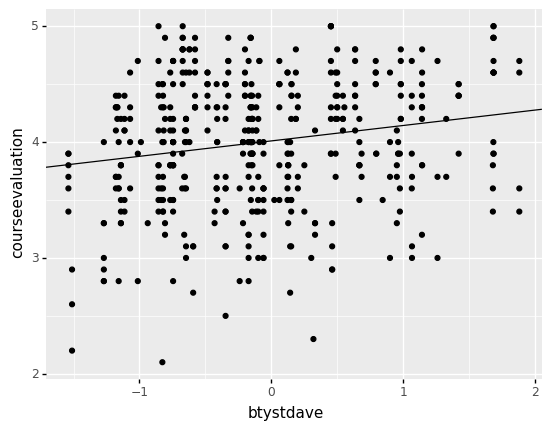

<ggplot: (22311235)>

In [38]:
fig3=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=beauty)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['btystdave'])))
fig3

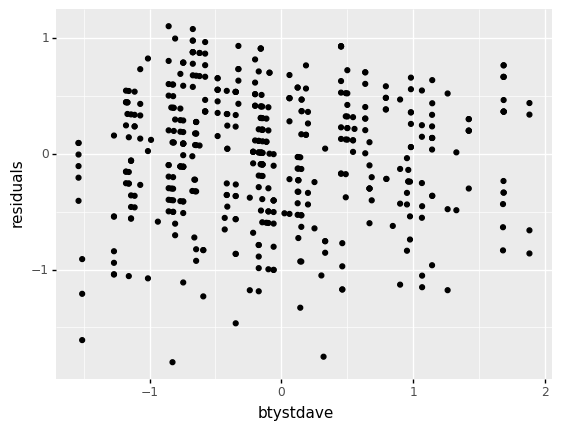

<ggplot: (22312951)>

In [39]:
fig2_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=beauty)
      +p9.geom_point())
fig2_res

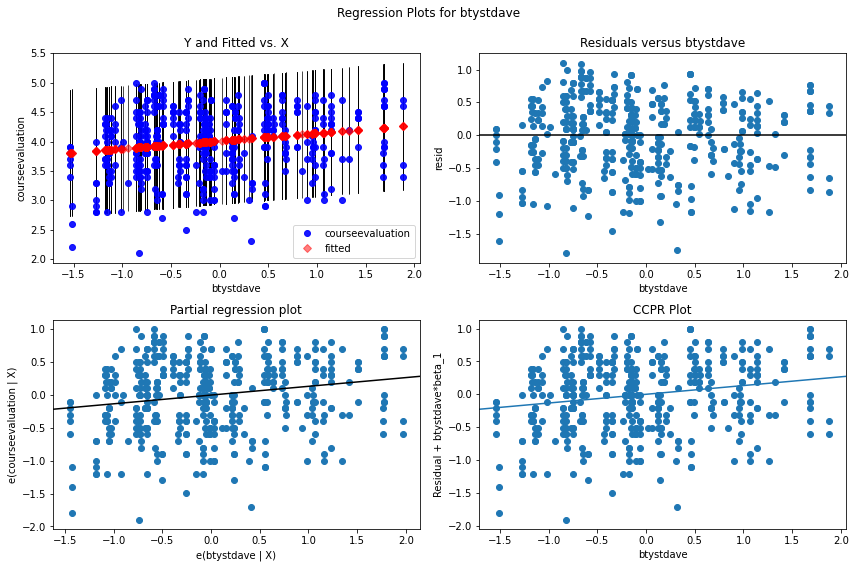

In [40]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Z wykresów wynika, że spełniono założenia
#create residual vs. predictor plot for 'x1'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, 'btystdave', fig=fig)

In [41]:
# Jako dodatkowe parametry dodano liczbę studentów oraz mnożono stopień "ładności" przez wiek
results = smf.ols('courseevaluation ~ btystdave*age + students', data=beauty).fit()
wyn=results.params
df['courseevaluation_pred']=results.predict()
df['residuals']=df['courseevaluation']-df['courseevaluation_pred']
wyn

Intercept        3.972007
btystdave       -0.346142
age              0.001601
btystdave:age    0.010353
students        -0.000248
dtype: float64

In [42]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       courseevaluation   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     7.115
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.45e-05
Time:                        12:35:08   Log-Likelihood:                -369.79
No. Observations:                 463   AIC:                             749.6
Df Residuals:                     458   BIC:                             770.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.9720      0.133     29.869

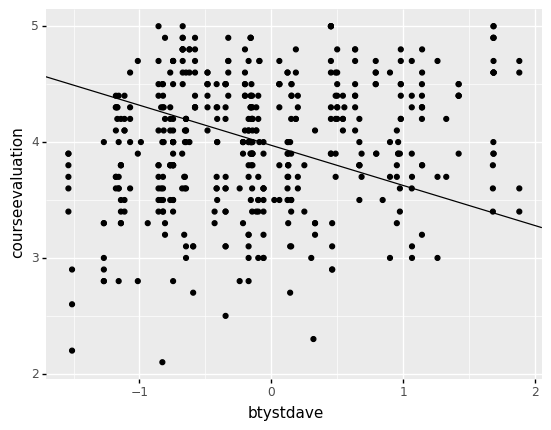

<ggplot: (22297015)>

In [43]:
fig3=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=beauty)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['btystdave'])))
fig3

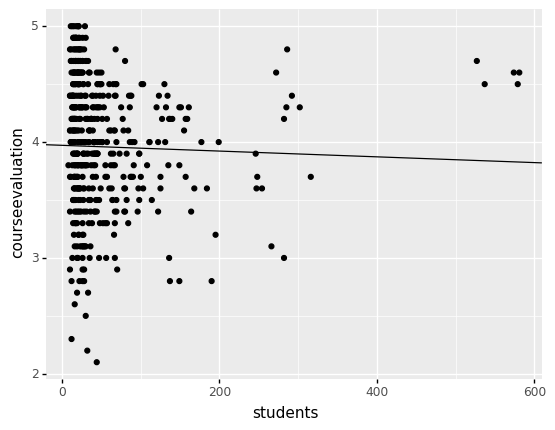

<ggplot: (12715943)>

In [44]:
fig3=(p9.ggplot(p9.aes(x='students',y='courseevaluation'),data=beauty)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['students'])))
fig3

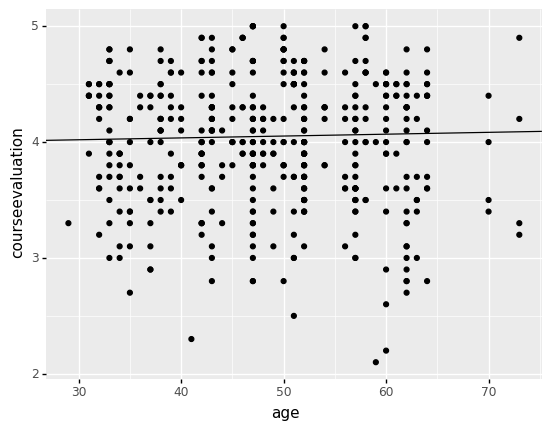

<ggplot: (22267039)>

In [45]:
fig3=(p9.ggplot(p9.aes(x='age',y='courseevaluation'),data=beauty)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['age'])))
fig3

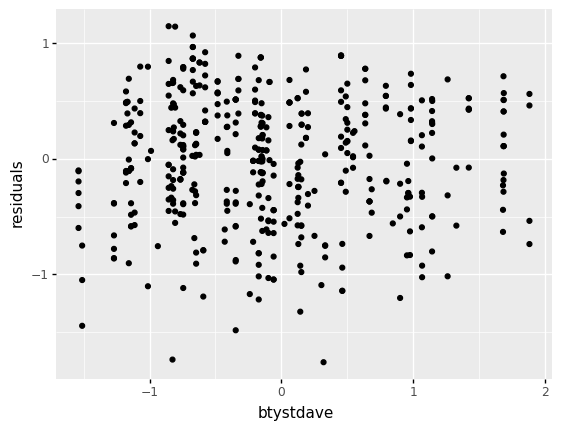

<ggplot: (23637333)>

In [46]:
fig2_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=beauty)
      +p9.geom_point())
fig2_res